### Atividade Curta 1 - Configurando o ambiente e capturando imagens

#### Aluno: 119891 - João Vitor Silva de Oliveira


In [65]:
import cv2
import PIL
import numpy as np
print('NumPy Version: ', np.__version__)
print('OpenCV Version: ', cv2.__version__)
print('PIL Version: ', PIL.__version__)

NumPy Version:  2.1.0
OpenCV Version:  4.11.0
PIL Version:  11.1.0


In [66]:
from PIL import Image
import os
import matplotlib.pyplot as plt

#### Convertendo para tons de cinza

In [67]:
imgs_originais = "imagens/originais/"
imgs_cinza = 'imagens/cinza'
os.makedirs(imgs_cinza, exist_ok=True)  

for arquivo in os.listdir(imgs_originais):
    imagem = Image.open(os.path.join(imgs_originais, arquivo))
    imagem_cinza = imagem.convert("L")
    imagem_cinza.save(os.path.join(imgs_cinza, arquivo))

#### Imagens de exemplo

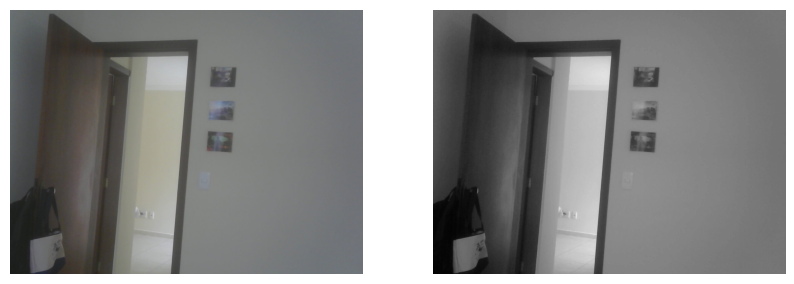

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(imagem)
axes[0].axis("off")  

axes[1].imshow(imagem_cinza, cmap="gray")
axes[1].axis("off")  

plt.show()

#### Calculando Imagens

In [69]:
arquivos = sorted([f for f in os.listdir(imgs_originais)])

# Abrir a primeira imagem
img_base = np.array(Image.open(os.path.join(imgs_cinza, arquivos[0])), dtype=np.int32)

# Inicializa as variáveis baseado na primeira imagem
acumulado = np.zeros_like(img_base)
soma = img_base


for i in range(len(arquivos) - 1):
    img1 = np.array(Image.open(os.path.join(imgs_cinza, arquivos[i])), dtype=np.int32)
    img2 = np.array(Image.open(os.path.join(imgs_cinza, arquivos[i + 1])), dtype=np.int32)

    # Calcula a soma
    soma += img2
    #Calcula a diferença e o acumulado
    diferenca = np.abs(img2 - img1)  
    acumulado += diferenca  

# Calcula a média
media = soma / len(arquivos)

In [70]:
# Inicia o calculo do desvio padrão
soma_quadrados = None
for arquivo in arquivos:
    img = np.array(Image.open(os.path.join(imgs_cinza, arquivo)), dtype=np.float32)
    
    # Somar os quadrados das diferenças em relação à média
    quadrado_diferenca = (img - media) ** 2

    if soma_quadrados is None:
        soma_quadrados = np.zeros_like(quadrado_diferenca, dtype=np.float32)
    soma_quadrados += quadrado_diferenca

# Calcula o desvio padrão
desvio_padrao = np.sqrt(soma_quadrados / len(arquivos))

Imagens geradas:


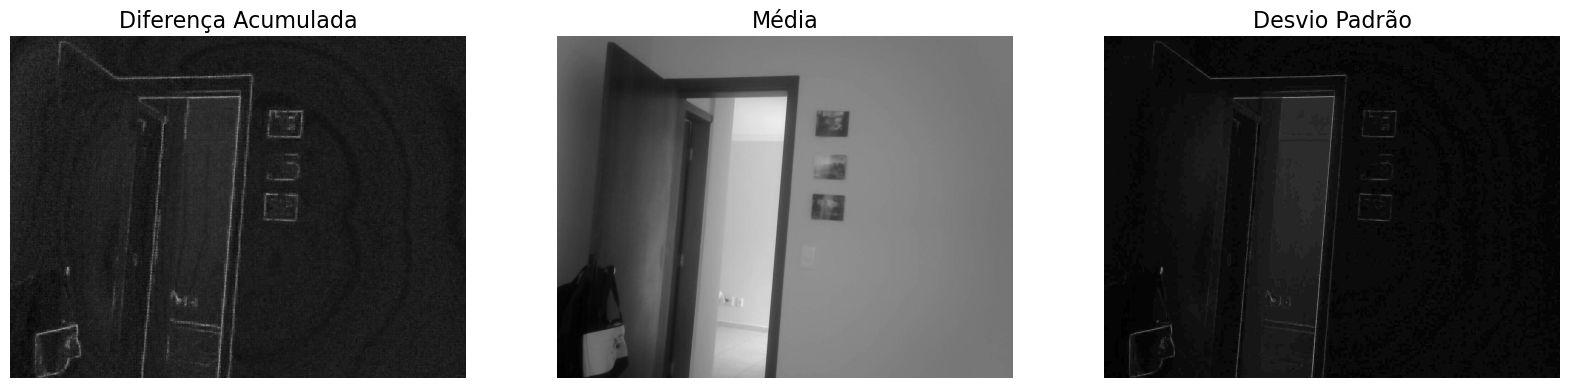

In [71]:
# Normalizar os valores entre 0 e 255
acumulado = np.clip(acumulado, 0, 255).astype(np.uint8)
media = np.clip(media, 0, 255).astype(np.uint8)
desvio_padrao = np.clip(desvio_padrao, 0, 255).astype(np.uint8)

# Salvando as imagens
Image.fromarray(acumulado).save("diferenca_acumulada.jpg")
Image.fromarray(media).save("imagem_media.jpg")
Image.fromarray(desvio_padrao).save("imagem_desvio.jpg")

print("Imagens geradas:")
imgDif = Image.open("diferenca_acumulada.jpg")
imgMed = Image.open("imagem_media.jpg")
imgDes = Image.open("imagem_desvio.jpg")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title("Diferença Acumulada", fontsize=16)
axes[0].imshow(imgDif, cmap="gray")
axes[0].axis("off")  
axes[1].set_title("Média", fontsize=16)
axes[1].imshow(imgMed, cmap="gray")
axes[1].axis("off")  
axes[2].set_title("Desvio Padrão", fontsize=16)
axes[2].imshow(imgDes, cmap="gray")
axes[2].axis("off")  
plt.show()